<h1>Yoda Retirer Dashboard</h1>

<p>Risk-averse investors can structure portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. It is one of the most important and influential economic theories dealing with finance and investment, hypoteshis put forth by Harry Markowitz in "Portfolio Selection"(published in 1952 by the Journal of Finance).</p>


In [16]:
# initial imports
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
#from datetime import datetime, timedelta
import hvplot.pandas
import panel as pn
import plotly.express as px
import seaborn as sns

import yoda_simulator as ys

# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')

<h1>Portfolio optimization process</h1>

<pre><code>1. defining portfolios
2. cleaning data
3. efficient frontier weight analysis
4......
5......
</code></pre>

# Import Data

In [2]:
# Import the portflios to Pandas DataFrames
portfolio1 = pd.read_csv('./all_data_pull/Yoda 1 - Equally Weighted Equity Portfolio.csv').set_index('Unnamed: 0')
portfolio2 = pd.read_csv('./all_data_pull/Yoda 2 - Fixed income Optimized Portfolio Yoda.csv').set_index('Unnamed: 0')
portfolio3 = pd.read_csv('./all_data_pull/Yoda 3 - Fixed income Equally Weighted.csv').set_index('Unnamed: 0')
portfolio4 = pd.read_csv('./all_data_pull/Yoda 4 - Blended - Will the real Yoda please stand up!.csv').set_index('Unnamed: 0')
portfolio5 = pd.read_csv('./all_data_pull/Yoda 5 - Maximized Profit Adjusting Returns.csv').set_index('Unnamed: 0')
display(portfolio1, portfolio2, portfolio3, portfolio4, portfolio5)

,SMH,XLU,QQQ
Unnamed: 0,,,
Mean Daily Returns,0.000857,0.000359,0.000673
Standard Deviation,0.014656,0.008761,0.010814
Weights,0.289930,0.364650,0.345420


,TLT
Unnamed: 0,
Daily Mean Returns,0.000116
Standard Deviation,0.007575
Weights,1.000000


,AGG,TLT,SHY,IEI,HYG,BKLN,LQD
Unnamed: 0,,,,,,,
Mean Daily Returns,0.000026,0.000116,0.000002,0.000028,-0.000020,-0.000049,0.000064
Standard Deviation,0.002021,0.007575,0.000670,0.001871,0.003806,0.002091,0.003117
Weights,0.143000,0.143000,0.143000,0.143000,0.143000,0.143000,0.143000


,SMH,XLU,QQQ,TLT
Unnamed: 0,,,,
Mean Daily Returns,0.000857,0.000359,0.000673,0.000116
Standard Deviation,0.014656,0.008761,0.010814,0.007575
Weights,0.228760,0.200550,0.310590,0.260100


,SMH,XLU,QQQ
Unnamed: 0,,,
Mean Daily Returns,0.000857,0.000359,0.000673
Standard Deviation,0.014656,0.008761,0.010814
Weights,0.289930,0.364650,0.345420


<h1>All Optimal Portfolios</h1>

<p>In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. </p>

<p>These functions will convert the plot object to a Panel pane.</p>

<p>Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.</p>

<p>Return a Panel pane object from each function that can be used to build the dashboard.</p>

<p>Note: Remove any <code>.show()</code> lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.</p>


In [3]:
#use interactive widgets for insert user data, which should be presented on the welcome tab, 
#and add click buton to call the functions for all portfolio.
#to make it easier

from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider
from ipywidgets import widgets
import yoda_simulator as ys
from IPython.display import display


#this widgets should be put in function at the end, 

slider = widgets.IntSlider(value= 5, min=5, max=30)
#years_until_retirement = slider.value

dropdown = widgets.Dropdown(options=['Yoda 1 - Equally Weighted Equity Portfolio',
                           'Yoda 2 - Fixed income Optimized Portfolio Yoda',
                           'Yoda 3 - Fixed income Equally Weighted',
                           'Yoda 4 - Blended - Will the real Yoda please stand up!', 
                           'Yoda 5 - Maximized Profit Adjusting Returns '])
#portfolio_choice = dropdown.value

investment = widgets.FloatText()

withdrawal_type = widgets.Dropdown(options=['fixed amount', 'fixed rate'])

withdrawal_number = widgets.FloatText()
#with withdraw_type = rate, it is like 0.05, if withdraw type = amount, should input $$$ amount.

investment_target = widgets.FloatText()

button = widgets.Button(description="Calculate!")
output = widgets.Output()

#here we are gonna need a function to get the output correctly. CHALLENGE!!!
def on_button_clicked(b):
    with output:
        print(years_to_retirement, portfolio_choice, initial_investment,
              withdraw_number, withdraw_type, investment_goal)
        
        
button.on_click(on_button_clicked)

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items = [
    Box([Label(value='Years Until Retirement'), slider], layout=form_item_layout),
    Box([Label(value='Yoda Portfolio Choice'),dropdown], layout=form_item_layout),
    Box([Label(value='Initial Investment'), investment], layout=form_item_layout),
    Box([Label(value='Withdrawal Type'), withdrawal_type], layout=form_item_layout),
    Box([Label(value='Withdrawal Amount/Rate'), withdrawal_number], layout=form_item_layout),
    Box([Label(value='Investment Goal'), investment_target], layout=form_item_layout),
    Box([Label(value='Additional Information'), widgets.Textarea()], layout=form_item_layout),
    Box([Label(value='YODA Calculator'), button], layout=form_item_layout)
    
]

widgets.interact_manual()

insert_param = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))
insert_param

Box(children=(Box(children=(Label(value='Years Until Retirement'), IntSlider(value=5, max=30, min=5)), layout=…

In [4]:
years_to_retirement = slider.value
portfolio_choice = dropdown.value
initial_investment = investment.value 
withdraw_number = withdrawal_number.value
withdraw_type = withdrawal_type.value
investment_goal = investment_target.value
#display should be take out from final dashboard, not to ruin it visually
display(years_to_retirement, portfolio_choice, 
        initial_investment, withdraw_type,
        withdraw_number, investment_goal)

26

'Yoda 4 - Blended - Will the real Yoda please stand up!'

200000.0

'fixed amount'

8000.0

350000.0

In [5]:
if portfolio_choice == 'Yoda 1 - Equally Weighted Equity Portfolio':
    portfolio = portfolio1
if portfolio_choice == 'Yoda 2 - Fixed income Optimized Portfolio Yoda':
    portfolio = portfolio2
if portfolio_choice == 'Yoda 3 - Fixed income Equally Weighted':
    portfolio = portfolio3
if portfolio_choice == 'Yoda 4 - Blended - Will the real Yoda please stand up!':
    portfolio = portfolio4
if portfolio_choice == 'Yoda 5 - Maximized Profit Adjusting Returns ':
    portfolio = portfolio5

<module 'matplotlib.pyplot' from '/Users/junweiluo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

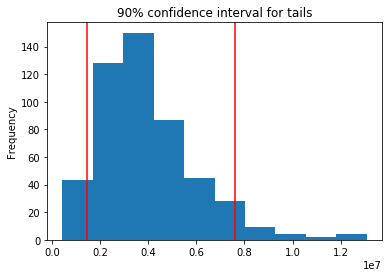

In [6]:
#should be deleted from here, just present into the panel dashboard

ys.confidence_interval(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement)

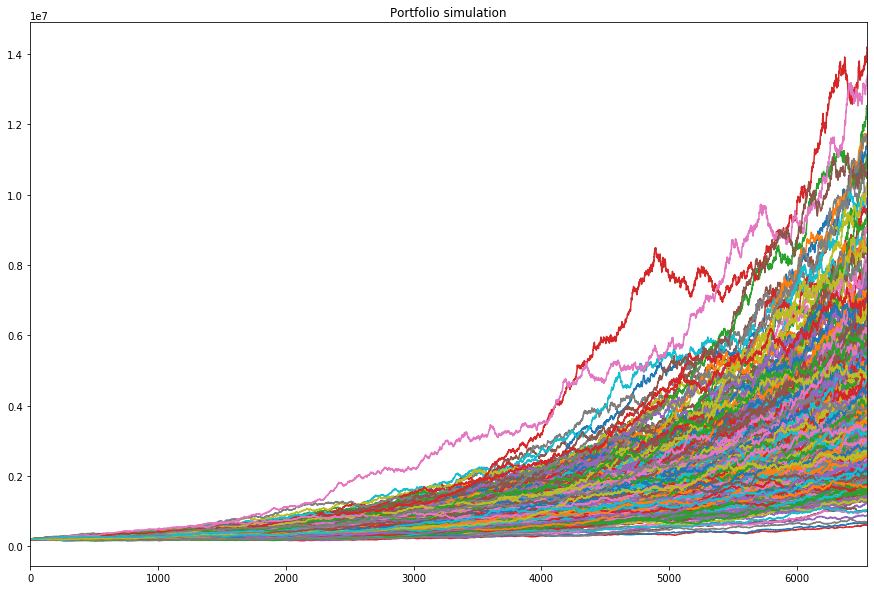

In [7]:
#should be deleted from here, just present into the panel dashboard

ys.simulation_chart(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement)

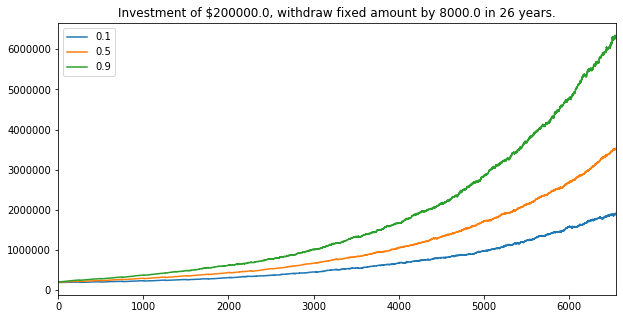

In [8]:
#should be deleted from here, just present into the panel dashboard
ys.quantile_chart(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement)

The desired withdraw amount is $18000 annually, and ending 10% percentile balance after 26 years would be $475709.


(None, <matplotlib.axes._subplots.AxesSubplot at 0x11bf20850>)

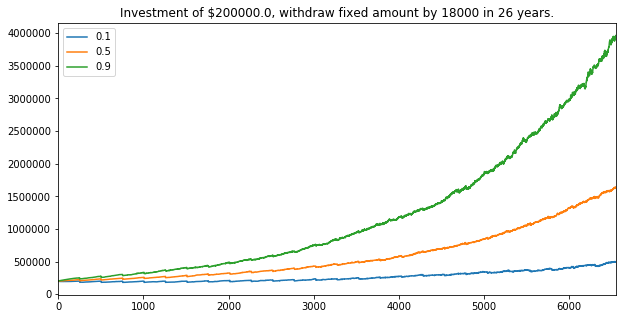

In [9]:
#should be deleted from here, just present into the panel dashboard
ys.search_withdraw_amount(portfolio, initial_investment, years_to_retirement,investment_goal)

The desired withdraw rate is 7.5% annually, and ending 10% percentile balance after 26 years would be $415719.


(None, <matplotlib.axes._subplots.AxesSubplot at 0x11b392990>)

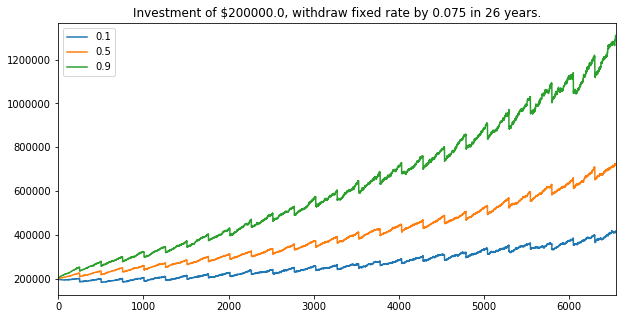

In [10]:
#should be deleted from here, just present into the panel dashboard

ys.search_withdraw_rate(portfolio, initial_investment, years_to_retirement,investment_goal)

- - -

In [ ]:

#guys, as Junwei already made simulator idea is to call all the functions from external py files.....this is just a frame 
#we should fill in and get a panel dashboard. 
#Welcome tab should have message on the left side and insert table on the right(from interactive widgets)
#each portfolio should be presented as separate tab
#last tab should be saving planner where we should call the function for search withdraw amount and rate
# challenge.....at the end we should try to export all the results on html page by bokeh but we'll see.....



## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [17]:
# Create a Title for the Dashboard
title = pn.pane.Markdown(
    """
# Yoda Retirer - retirement simulation tool,,,,,,
""",
    width=800,
)

welcome = pn.pane.Markdown(
    """
This dashboard presents a visual analysis of retirement simulation based on user risk preferences.
"""
)

# Create a tab layout for the dashboard
tabs = pn.Tabs(
    ("Welcome", pn.Row(welcome,#insert_function()),
    ("Yoda 1 - Equally Weighted Equity Portfolio", pn.Column(ys.simulation_chart(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement),
                                                             ys.confidence_interval(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement),
                                                             ys.quantile_chart(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement),
                                                             ys.search_withdraw_rate(portfolio, initial_investment, years_to_retirement,investment_goal)),
    
    
    ("Yoda 2 - Fixed income Optimized Portfolio Yoda", pn.Column(ys.simulation_chart(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement),
                                                             ys.confidence_interval(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement),
                                                             ys.quantile_chart(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement),
                                                             ys.search_withdraw_rate(portfolio, initial_investment, years_to_retirement,investment_goal)),
    
    ("Yoda 3 - Fixed income Equally Weighted", pn.Column(ys.simulation_chart(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement),
                                                             ys.confidence_interval(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement),
                                                             ys.quantile_chart(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement),
                                                             ys.search_withdraw_rate(portfolio, initial_investment, years_to_retirement,investment_goal)),
     
    ("Yoda 4 - Blended - Will the real Yoda please stand up!", pn.Column(ys.simulation_chart(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement),
                                                             ys.confidence_interval(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement),
                                                             ys.quantile_chart(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement),
                                                             ys.search_withdraw_rate(portfolio, initial_investment, years_to_retirement,investment_goal)),
     
    ("Yoda 5 - Maximized Profit Adjusting Returns", pn.Column(ys.simulation_chart(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement),
                                                             ys.confidence_interval(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement),
                                                             ys.quantile_chart(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement),
                                                             ys.search_withdraw_rate(portfolio, initial_investment, years_to_retirement,investment_goal)),
    
    ("Saving Planner", pn.Row(parallel_coordinates(), parallel_categories(), width=960),),
)

panel = pn.Column(pn.Row(title), tabs, width=900)

SyntaxError: invalid syntax (<ipython-input-17-238357333794>, line 47)

## Serve the Panel Dashboard

In [12]:
panel.servable()

NameError: name 'panel' is not defined